# Monday, April 28th

Last week, we setup code to run Conway's Game of Life and stored the history of cell configurations.

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def count_live_neighbors(cells,padded_cells,i,j):
    # Recall: The [i,j]th index of cells corresponds to
    # the [i+1, j+1]st index of padded_cells
    
    # We want a 3 by 3 grid centered at the [i,j]th cell of cells
    grid = padded_cells[i:i+3, j:j+3]

    # We can subtract cells[i,j] from the sum
    # to either remove a wrongly counted live neighbor
    # or do nothing if cells[i,j] is not alive
    live_neighbors = np.sum(grid) - cells[i,j]
    
    return live_neighbors

In [11]:
def update_cells(cells):
    new_cells = cells.copy()

    nrows, ncols = cells.shape
    padded_cells = np.zeros((nrows+2, ncols+2), dtype=int)
    padded_cells[1:-1, 1:-1] = cells
    for i in range(nrows):
        for j in range(ncols):
            # Get the number of live neighbors, excluding the cell itself
            live_neighbors = count_live_neighbors(cells, padded_cells, i, j)
            
            # If the is alive...
            if cells[i,j] == 1:
                # and if the cell has exactly 2 or 3 live neighbors...
                if live_neighbors == 2 or live_neighbors == 3:
                    # then the cell lives
                    new_cells[i,j] = 1
                else:
                    # otherwise the cell dies
                    new_cells[i,j] = 0
            # If the cell is not alive...
            else:
                # and if it has exactly 3 live neighbors...
                if live_neighbors == 3:
                    # then the cell becomes alive
                    new_cells[i,j] = 1
                else:
                    # otherwise the cell remains dead
                    new_cells[i,j] = 0
    return new_cells

In [12]:
def random_state(n, ratio_live_cells):
    cells = np.zeros((n,n))

    live_cell_mask = np.random.random((n,n)) < ratio_live_cells
    cells[live_cell_mask] = 1
    
    return cells

In [13]:
T = 200    # Set the number of time steps
n = 100   # Set the grid size, i.e. n x n

cells = random_state(n, .1)        # Initialize the starting configuration
cells_history = np.zeros((n,n,T))  # Initialize the array containing all configurations
cells_history[:,:,0] = cells       # Set the t=0 slice to match the initial configuarion

for t in range(1,T):
    cells = update_cells(cells)    # Update the `cells` array
    cells_history[:,:,t] = cells   # store the update cells array in slice t

In [14]:
# Count the number of live cells at each time slice
number_of_live_cells = np.sum(cells_history == 1, axis=(0,1))

Text(0, 0.5, 'Number of live cells')

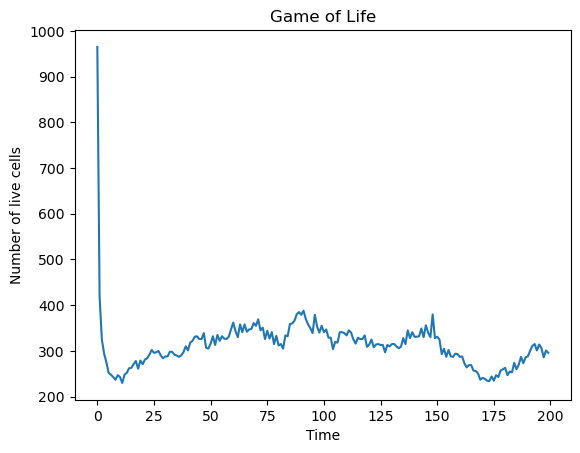

In [15]:
t_list = np.arange(T)

plt.plot(t_list, number_of_live_cells, '-')

plt.title('Game of Life')
plt.xlabel('Time')
plt.ylabel('Number of live cells')

Note: Our initial condition is a random configuration of live cells, where we are controlling the percentage of live cells. It would be useful to make some visualization that accounts for this randomness, rather than relying any one particular run.

One thing we could do is to run this simulation several times and plot the curve for run. Let's write a function that will run a single simulation that we can call several times.

In [28]:
def run_game_of_life(T, n, starting_state_func, starting_state_func_args=()):
    cells = starting_state_func(n, *starting_state_func_args) # Initialize the starting configuration
    cells_history = np.zeros((n,n,T))  # Initialize the array containing all configurations
    cells_history[:,:,0] = cells       # Set the t=0 slice to match the initial configuarion

    for t in range(1,T):
        cells = update_cells(cells)    # Update the `cells` array
        cells_history[:,:,t] = cells   # store the update cells array in slice t
        
    return cells_history

In [9]:
T = 100
n = 50
cells_history = run_game_of_life(T,n,random_state, (.1,))

Now let's run this simulation several times:

In [10]:
import time

In [11]:
num_runs = 100
cells_histories = []


t0 = time.time()
for i in range(num_runs):
    cells_history = run_game_of_life(T,n,random_state, (.1,))
    cells_histories.append(cells_history)
t1 = time.time()
print(t1 - t0)

100.88733983039856


Let's count the number of live cells at each time step for each simulation:

In [12]:
def get_number_of_live_cells(cells_history):
    return np.sum(cells_history == 1, axis=(0,1))

In [13]:
numbers_of_live_cells = [get_number_of_live_cells(cells_history) for cells_history in cells_histories]

Text(0.5, 1.0, 'Game of Life')

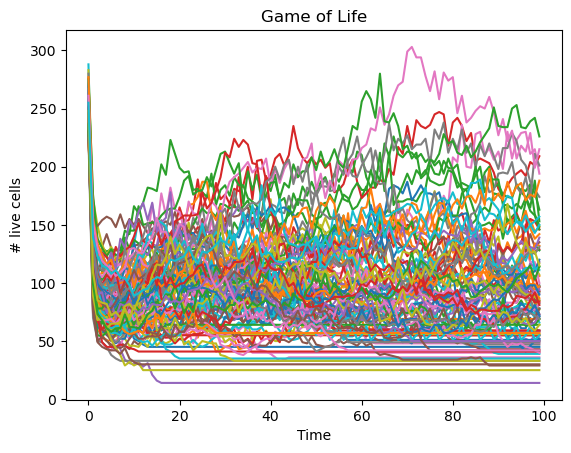

In [14]:
fig = plt.figure()

t_list = np.arange(T)

for i, number_of_live_cells in enumerate(numbers_of_live_cells):
    plt.plot(t_list, number_of_live_cells, label=i)
    
plt.xlabel('Time')
plt.ylabel('# live cells')
plt.title('Game of Life')
    
#plt.legend()

In the above figure, it is difficult to make sense of any one particular curve. Instead, we can try to focus on the aggregate behavior. Instead of using varying colors, let's use a fixed color.

Text(0.5, 1.0, 'Game of Life')

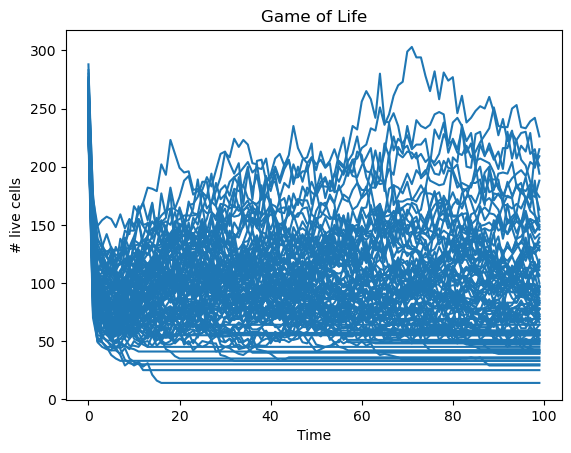

In [15]:
fig = plt.figure()

t_list = np.arange(T)

for i, number_of_live_cells in enumerate(numbers_of_live_cells):
    plt.plot(t_list, number_of_live_cells, label=i, color='C0')
    
plt.xlabel('Time')
plt.ylabel('# live cells')
plt.title('Game of Life')
    
#plt.legend()

Let's also use some transparency. The idea is that, if several curves are intersecting, they will appear darker, while curves that are separate will appear faint.

Text(0.5, 1.0, 'Game of Life')

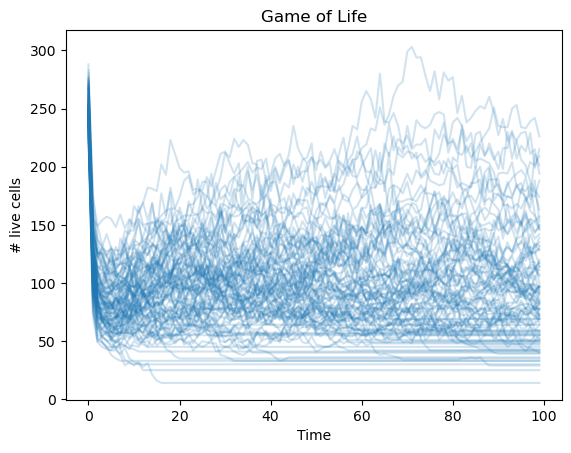

In [16]:
fig = plt.figure()

t_list = np.arange(T)

for i, number_of_live_cells in enumerate(numbers_of_live_cells):
    plt.plot(t_list, number_of_live_cells, label=i, color='C0', alpha=.2)
    
plt.xlabel('Time')
plt.ylabel('# live cells')
plt.title('Game of Life')
    
#plt.legend()

We could also average all of these counts and plot the mean:

In [17]:
numbers_of_live_cells = np.array(numbers_of_live_cells)

In [18]:
numbers_of_live_cells.shape

(100, 100)

The row index selects the specific simulation that was run, and the column index selects the time. Let's average through all the simulations for each time step.

Text(0.5, 1.0, 'Game of Life')

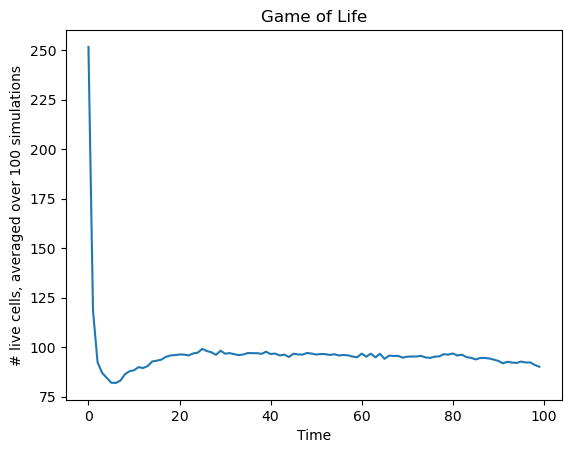

In [19]:
average_number_of_live_cells_per_time_step = np.mean(numbers_of_live_cells, axis=0)

plt.plot(t_list, average_number_of_live_cells_per_time_step)

plt.xlabel('Time')
plt.ylabel('# live cells, averaged over {} simulations'.format(num_runs))
plt.title('Game of Life')

## Using `np.roll`

In [20]:
#help(np.roll)

The `np.roll` function will shift the elements of an array. Any elements that are pushed "outside" of the array wrap around to the opposite side.

In [21]:
a = np.arange(10)

In [22]:
print(a)

rolled_a = np.roll(a, shift=1)
print(rolled_a)

[0 1 2 3 4 5 6 7 8 9]
[9 0 1 2 3 4 5 6 7 8]


In [23]:
print(a)

rolled_a = np.roll(a, shift=5)
print(rolled_a)

[0 1 2 3 4 5 6 7 8 9]
[5 6 7 8 9 0 1 2 3 4]


In [24]:
print(a)

rolled_a = np.roll(a, shift=-3)
print(rolled_a)

[0 1 2 3 4 5 6 7 8 9]
[3 4 5 6 7 8 9 0 1 2]


What about rolling 2D arrays?

In [25]:
a = np.arange(25).reshape(5,5)

print(a)
print()
rolled_a = np.roll(a, shift=1)
print(rolled_a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

[[24  0  1  2  3]
 [ 4  5  6  7  8]
 [ 9 10 11 12 13]
 [14 15 16 17 18]
 [19 20 21 22 23]]


In [26]:
print(a)
print()
rolled_a = np.roll(a, shift=-4)
print(rolled_a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

[[ 4  5  6  7  8]
 [ 9 10 11 12 13]
 [14 15 16 17 18]
 [19 20 21 22 23]
 [24  0  1  2  3]]


Note: We can supply an `axis` argument to only roll through the specified axis:

In [27]:
rolled_a = np.roll(a, shift=1, axis=0)
print(a)
print()
print(rolled_a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

[[20 21 22 23 24]
 [ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


In [28]:
rolled_a = np.roll(a, shift=2, axis=1)
print(a)
print()
print(rolled_a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

[[ 3  4  0  1  2]
 [ 8  9  5  6  7]
 [13 14 10 11 12]
 [18 19 15 16 17]
 [23 24 20 21 22]]


We could perform two rolls, first on the rows and then on the columns:

In [29]:
rolled_a = np.roll(np.roll(a, shift=1, axis=0), shift=3,axis=1)
print(a)
print()
print(rolled_a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

[[22 23 24 20 21]
 [ 2  3  4  0  1]
 [ 7  8  9  5  6]
 [12 13 14 10 11]
 [17 18 19 15 16]]


The cell above rolls the rows down by `1` and the columns to the right by `3`.

Note: the `np.roll` function can take in tuples of integers for `shift` and `axis`. We could set `shift = (1,3)` and `axis=(0,1)` to perform the same roll as above:

In [30]:
rolled_a = np.roll(a, shift=(1,3), axis=(0,1))
print(a)
print()
print(rolled_a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

[[22 23 24 20 21]
 [ 2  3  4  0  1]
 [ 7  8  9  5  6]
 [12 13 14 10 11]
 [17 18 19 15 16]]


Let's use `np.roll` to create a periodic boundary for the Game of Life (rather than padding). This comes into play when counting live neighbors, so we'll have modify that function.

Strategy: To construct a `3` by `3` grid centered at cell `[i,j]`, we will roll the array so that the `[i,j]`th cell is positioned in the `[1,1]` entry. If we can do this, then a slice containing the first `3` rows and first `3` columns will be our grid.

Let's try to work this out with a simple example:

In [31]:
i = 3
j = 4
print(a[i,j])

rolled_a = np.roll(a, shift=(-2,-3), axis=(0,1))
print(a)
print()
print(rolled_a[:3,:3])

19
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

[[13 14 10]
 [18 19 15]
 [23 24 20]]


In [32]:
i = 1
j = 3
print(a[i,j])

rolled_a = np.roll(a, shift=(0,-2), axis=(0,1))
print(a)
print()
print(rolled_a[:3,:3])

8
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

[[ 2  3  4]
 [ 7  8  9]
 [12 13 14]]


We can roll the array by `-(i-1)` rows and `-(j-1)` columns to shift the `[i,j]`th entry into the `[1,1]` entry.

In [33]:
i = 3
j = 2
print(a[i,j])

rolled_a = np.roll(a, shift=(-(i-1),-(j-1)), axis=(0,1))
print(a)
print()
print(rolled_a[:3,:3])

17
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

[[11 12 13]
 [16 17 18]
 [21 22 23]]


In [34]:
def count_live_neighbors(cells,padded_cells,i,j):
    # We'll roll the cells array to place the [i,j]th cell in the [1,1] position
    rolled_cells = np.roll(cells,shift=(-(i-1), -(j-1)), axis=(0,1))
    
    # We can then take a slice of the first three rows and columns
    grid = rolled_cells[:3,:3]

    # We can subtract cells[i,j] from the sum
    # to either remove a wrongly counted live neighbor
    # or do nothing if cells[i,j] is not alive
    live_neighbors = np.sum(grid) - cells[i,j]
    
    return live_neighbors

Now that we've updated our `count_live_neighbors_function`, let's re-run some simulations.

In [35]:
cells_history = run_game_of_life(T,n,random_state, (.1,))

Let's animate our simulation:

In [36]:
%matplotlib notebook
#%matplotlib qt
from matplotlib.animation import FuncAnimation

<IPython.core.display.Javascript object>


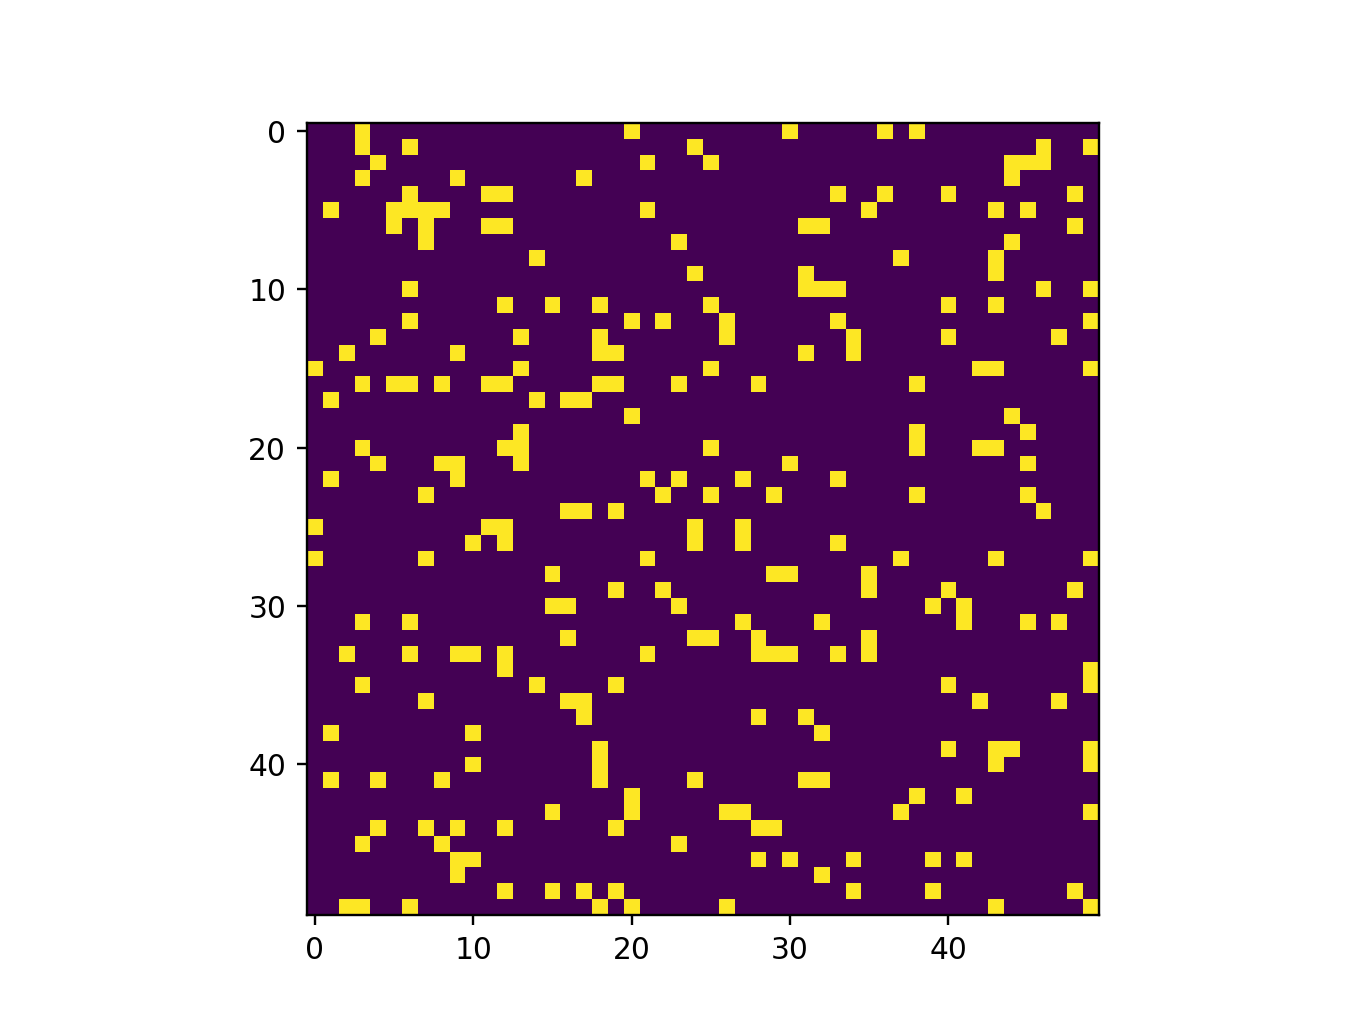

In [37]:
#x = np.zeros((200,200), dtype = int)
n = 50
cells = random_state(n,.1)

fig = plt.figure()
im = plt.imshow(cells,vmin=0,vmax=1)               # Generate the initial plot

def animate(i):
    #x[:,:]= (np.random.random(x.shape) > .5)   # Update the x array with random data
    cells[:,:] = update_cells(cells)
    im.set_data(cells)                             # Update the figure with new x array
    return im

anim = FuncAnimation(fig, animate, cache_frame_data=False)
plt.show()

In [38]:
%matplotlib inline

Let's rerun our earlier plot that produced many simulations and compare.

In [40]:
num_runs = 100
cells_histories_periodic = []


t0 = time.time()
for i in range(num_runs):
    cells_history = run_game_of_life(T,n,random_state, (.1,))
    cells_histories_periodic.append(cells_history)
t1 = time.time()
print(t1 - t0)

404.958377122879


In [41]:
numbers_of_live_cells_periodic = [get_number_of_live_cells(cells_history) for cells_history in cells_histories_periodic]

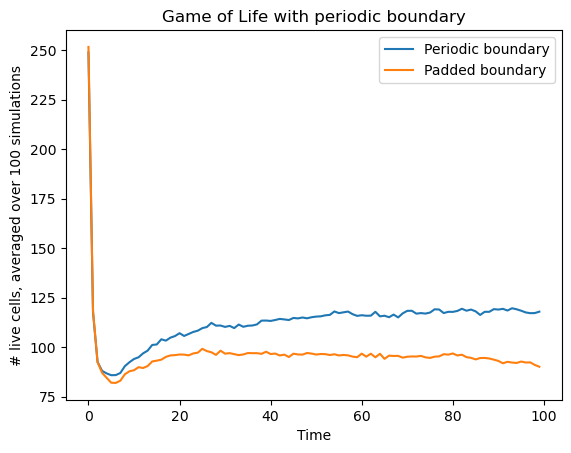

In [42]:
average_number_of_live_cells_per_time_step_periodic = np.mean(numbers_of_live_cells_periodic, axis=0)

plt.plot(t_list, average_number_of_live_cells_per_time_step_periodic,label='Periodic boundary')
plt.plot(t_list, average_number_of_live_cells_per_time_step,label='Padded boundary')

plt.xlabel('Time')
plt.ylabel('# live cells, averaged over {} simulations'.format(num_runs))
plt.title('Game of Life with periodic boundary')

plt.legend()

# Wednesday, April 30th

Running the 100 simulations using Monday's code is somewhat slow (~6 minutes for the periodic boundary simulations). Can we do anything to speed this up?

Let's start by looking at the `count_live_neighbors` function. In this function, we construct a `3` by `3` grid centered at each cell, which is similar to what we did for the image denoising project. For that project, we also discussed using NumPy to create these grids faster.

The key idea is to create a "stack" of cell arrays, where each layer of the "stack" has been shifted in different ways. If we look at the `[i,j]`th entry of the "stack", we get all 9 neighboring cells.

In [16]:
n = 50
cells = random_state(n, .1)

Let's try to create a `live_neighbors` array with the same shape as `cells`, where the `[i,j]`th entry stores the number live neighbors of the `[i,j]`th entry of `cells`. 

For our stacked array, it will be useful to first get a padded version of `cells`.

In [17]:
num_rows, num_cols = cells.shape

padded_cells = np.zeros((num_rows + 2, num_cols + 2), dtype=int)
padded_cells[1:-1, 1:-1] = cells    # Place the `cells` array in 
                                    # the center of `padded_cells`

We would like to create nine different versions of the `padded_cells` array, one for each possible shift of the `cells` array within the `padded_cells` dimensions.

In [ ]:
# Starting at [1,1]
padded_cells0 = np.zeros((num_rows + 2, num_cols + 2), dtype=int)
padded_cells0[1:num_rows+1, 1:num_cols+1] = cells 

# Starting at [0,0]
padded_cells1 = np.zeros((num_rows + 2, num_cols + 2), dtype=int)
padded_cells1[0:num_rows, 0:num_cols] = cells

# Starting at [0,1]
padded_cells2 = np.zeros((num_rows + 2, num_cols + 2), dtype=int)
padded_cells2[0:num_rows, 1:num_cols+1] = cells

# Starting at [0,2]
padded_cells3 = np.zeros((num_rows + 2, num_cols + 2), dtype=int)
padded_cells3[0:num_rows, 2:num_cols+2] = cells

# Starting at [1,0]
padded_cells4 = np.zeros((num_rows + 2, num_cols + 2), dtype=int)
padded_cells4[1:num_rows+1, 0:num_cols] = cells

# ...

Instead of all of this manual definition, can we use a `for` loop?

In [18]:
padded_cells_shifts = np.zeros((num_rows+2, num_cols+2, 9),dtype=int)

k = 0
for i in range(3):
    for j in range(3):
        #padded_cells = np.zeros((num_rows+2, num_cols+2),dtype=int)
        padded_cells_shifts[i:num_rows + i, j:num_cols + j, k] = cells
        k += 1

In [19]:
padded_cells_shifts.shape

(52, 52, 9)

We used the padding to generate the shifted arrays, but we can chop off the padded rows and columns:

In [21]:
cells_shifts = padded_cells_shifts[1:-1, 1:-1]
print(cells_shifts.shape)

(50, 50, 9)


We can identify live cells with a Boolean array:

In [24]:
live_neighbor_counts = (cells_shifts == 1).sum(axis=2)

live_neighbor_counts

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 2, 2, 0],
       [0, 0, 0, ..., 2, 2, 1],
       [0, 0, 0, ..., 1, 1, 1]])

Let's create a function that accomplishes this task:

In [26]:
def get_live_neighbor_counts(cells):
    num_rows, num_cols = cells.shape
    padded_cells_shifts = np.zeros((num_rows+2, num_cols+2, 9),dtype=int)

    k = 0
    for i in range(3):
        for j in range(3):
            padded_cells_shifts[i:num_rows + i, j:num_cols + j, k] = cells
            k += 1
    
    cells_shifts = padded_cells_shifts[1:-1, 1:-1]
    live_neighbor_counts = (cells_shifts == 1).sum(axis=2) - (cells == 1)
    
    return live_neighbor_counts

Now we just need to modify our `update_cells` function to use this new `get_live_neighbor_counts` function.

In [27]:
def update_cells(cells):
    new_cells = cells.copy()

    nrows, ncols = cells.shape
    
    live_neighbor_counts = get_live_neighbor_counts(cells)
    
    for i in range(nrows):
        for j in range(ncols):
            # Get the number of live neighbors, excluding the cell itself
            live_neighbors = live_neighbor_counts[i,j]
            
            # If the is alive...
            if cells[i,j] == 1:
                # and if the cell has exactly 2 or 3 live neighbors...
                if live_neighbors == 2 or live_neighbors == 3:
                    # then the cell lives
                    new_cells[i,j] = 1
                else:
                    # otherwise the cell dies
                    new_cells[i,j] = 0
            # If the cell is not alive...
            else:
                # and if it has exactly 3 live neighbors...
                if live_neighbors == 3:
                    # then the cell becomes alive
                    new_cells[i,j] = 1
                else:
                    # otherwise the cell remains dead
                    new_cells[i,j] = 0
    return new_cells

In [29]:
import time

In [30]:
num_runs = 100
cells_histories = []


t0 = time.time()
for i in range(num_runs):
    cells_history = run_game_of_life(T,n,random_state, (.1,))
    cells_histories.append(cells_history)
t1 = time.time()
print(t1 - t0)

21.932120323181152


Comparing with our runs from Monday, this is about 5 times faster. Can we do more?

Let's try to use NumPy to avoid the nested `for` loops in the `update_cells` function. We want to:
 - Find live cells with exactly `2` or `3` live neighbors
 - Find non-live cells with exactly `3` live neighbors
 
If we initialize the `updated_cells` array to be `0`s (i.e. nonlive cells), we just need to set the above groups to be `1`.

In [34]:
num_rows, num_cols = cells.shape

updated_cells = np.zeros((num_rows, num_cols), dtype=int)

live_neighbor_counts = get_live_neighbor_counts(cells)

live_mask = (cells == 1)
nonlive_mask = (cells == 0)

two_neighbors_mask = (live_neighbor_counts == 2)
three_neighbors_mask = (live_neighbor_counts == 3)

stay_live_mask = live_mask * (two_neighbors_mask + three_neighbors_mask)
become_live_mask = nonlive_mask * three_neighbors_mask
live_mask = (stay_live_mask + become_live_mask)

updated_cells[live_mask] = 1

Let's modify our `update_cells` function with this new version.

In [35]:
def update_cells(cells):
    num_rows, num_cols = cells.shape

    updated_cells = np.zeros((num_rows, num_cols), dtype=int)

    live_neighbor_counts = get_live_neighbor_counts(cells)

    live_mask = (cells == 1)
    nonlive_mask = (cells == 0)

    two_neighbors_mask = (live_neighbor_counts == 2)
    three_neighbors_mask = (live_neighbor_counts == 3)

    stay_live_mask = live_mask * (two_neighbors_mask + three_neighbors_mask)
    become_live_mask = nonlive_mask * three_neighbors_mask
    live_mask = (stay_live_mask + become_live_mask)

    updated_cells[live_mask] = 1
    
    return updated_cells

In [36]:
num_runs = 100
cells_histories = []

t0 = time.time()
for i in range(num_runs):
    cells_history = run_game_of_life(T,n,random_state, (.1,))
    cells_histories.append(cells_history)
t1 = time.time()
print(t1 - t0)

2.5756266117095947


We've picked up another ~$8$x speed boost, making our code ~$40$x faster.

We could similarly make modifications to the `get_live_neighbor_counts` function if we wanted to work with a periodic boundary.